## Computational Guided Inquiry for Polar Science (2018)

## Seasonal Arctic ice melt - 3. Effects of sea water

### Activity overview  
2. Find the freezing point of Arctic sea ice in equilibrium with sea water
3. Correct the enthalpy of fusion to Arctic temperature

### Pre-class activities

1. Read the Introduction
3. Look up and record literature values of heat capacities ($C_{P, \space liq}$ and $C_{P, \space ice}$) of liquid water and ice, in SI units ($J \over mol \ K$).
3. Write Raoult's Law, and define all the terms in it. See, e.g., https://en.wikipedia.org/wiki/Raoult%27s_law.
4. Write the Kirchoff Equation for correcting enthalpy changes, and define all the terms in it. See, e.g., https://www.youtube.com/watch?v=RveISCN69c8). Thinking ahead, bear in mind that when you go to apply Kirchoff's Equation, you'll be using the chemical equation $H_2O(l) \to H_2O(g)$ (see the Introduction for details). 

## Introduction


_Climate connection_  
We have argued that human activity has changed the composition of the atmosphere, changed the pattern of sea ice melt in the Arctic, and that proper modeling of climate depends on quantitative representation of the thermodynamics of sea ice. We have estimated the energy needed to effect the seasonal melting of Arctic sea ice. In this CGI, we will refine this idea a little. Specifically, we'll be exploring what difference it makes that the ice is forming from seawater, and is in equilibrium with it. Both are definite, measureable effects that could potentially impact climate predictions.

_Special considerations for sea ice_   
Figure 1 shows a phase diagram of pure water.

<p style ='text-align: center;'>
<img src="https://opentextbc.ca/chemistry/wp-content/uploads/sites/150/2016/05/CNX_Chem_10_04_H2OPhasDi2.jpg" height="300" width="600"/> 
Figure 1. Phase diagram of water.
</p>


But this phase diagram refers to _pure_ water, whereas sea water is salty: on average, there are 35 grams of salt, mostly NaCl, in every kilogram of seawater. What difference does that make? One difference is that ice freezes at a lower temperature when it is exposed to salty water (this is why salt is sometimes applied to icy roads). Another difference is that the reduction in freezing point will cause a slight change in the enthalpy of melting, $\Delta H_{fus}$. We'll take up the theory behind these two effects next.

_Raoult's Law_  
To get at freezing point depression, it is useful to think about _Raoult's Law_. According to Raoult's Law, the equilibrium vapor pressure of salty water is reduced by a factor $\chi$, the mole fraction of water in a salty solution. Raoult's law is written

<p style = 'text-align: right;'>
$ P_{liq/vap} = P_{liq/vap}^*  \space \chi $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (1) $
</p>

where $P_{liq/vap}$ written without the asterisk is meant to indicate the equilibrium vapor pressure of salty water, and $\chi$ is the mole fraction of _water_ in the salty solution. The usual way of obtaining the latter is to assume you have 1 liter of solution, which contains 55.5 moles of water along with some solute. The moles of solute equals the molarity of the salt (since we're assuming 1 liter of solution) times what is called the _van't Hoff_ factor, usually designated as $i$. The van't Hoff factor takes into account the fact when some solutes dissolve, multiple particles enter the solution. Thus $i=1$ if the solute is sucrose, but $i=2$ if the solute is NaCl, etc. 

To find the new freezing point of ice with salty water, one could make a graph of $P_{liq/vap}$ as obtained by Raoult's formula, and note where this new line intersects $P_{ice/vap}^*$. That intersection occurs at the freezing point of ice in equilibrium with salty water. 

_Kirchoff's Equation_  
Next we need to address the enthalpy of melting at this new temperature. Fortunately a correction is a available that allows one to use the enthalpy of fusion at one temperature to compute the value at a different temperature. This is the _Kirchoff Equation_,

<p style = 'text-align: right;'>
$ \Delta H_{fus}(T) = \Delta H_{fus}(T_3) + (C_{P, \space liq} - C_{P, \space ice})\Delta T $
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad (2) $
</p>

where $C_{P, \space liq}$ and $C_{P, \space ice}$ are the constant-pressure heat capacities of liquid and ice. 

Relevant values for water, in SI units, are as follows.

$ M = 0.018 \space kg/mol $  
$ \rho_{solid} = 9.17 \times 10^2 \space  kg/m^3 $  
$ \rho_{liquid} = 1.00 \times 10^3 \space kg/m^3 $  
$ P_3 = 611.7 \space Pa $  
$ T_3 = 273.16 \space K $  
$ \Delta H_{vap} = 44.0 \space kJ/mol $    
$ \Delta H_{sub} = 50.0 \space kJ/mol $   
$ \Delta H_{fus} = 6.0 \space kJ/mol $  



In [1]:
# Load packages
from numpy import *
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### Part I. Constructing a Raoult-corrected liquid-vapor phase boundary

In [3]:
# Specify additional constants, in SI units
rho_liquid = 1.00e3 # density of water kg/m^3
P3 = 611.7 # Triple point pressure, pascals
T3 = 273.16 # Triple point temperature, kelvin
Hvap = 44000 # Joules/mol
Hsub = 50000 # Joules/mol
R = 8.314 # J/mol-K

First, the ice/vapor boundary for pure ice

<IPython.core.display.Javascript object>


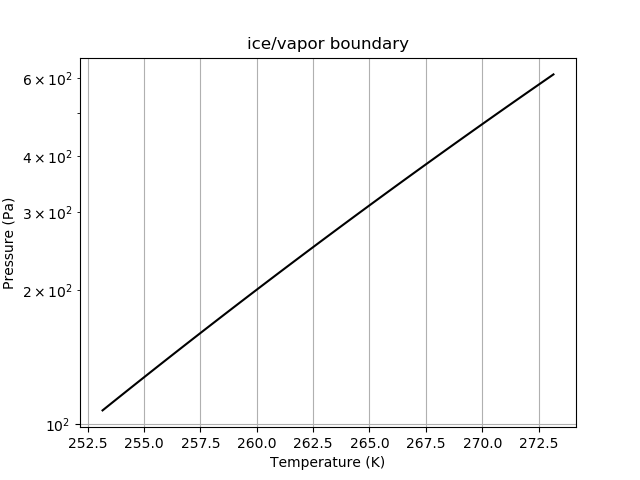

In [4]:
# Define temperature range for this boundary
Tsub = linspace(T3-20, T3)

# Use the Clausius-Clapeyron Equation
Psub = P3 * exp((-Hsub/R)*((1/Tsub)-(1/T3)))

# Graph it
figure()
semilogy(Tsub, Psub,'k')
xlabel("Temperature (K)")
ylabel("Pressure (Pa)")
title("ice/vapor boundary")
grid('on')

Next, draw the liquid/vapor boundary for pure water

<IPython.core.display.Javascript object>


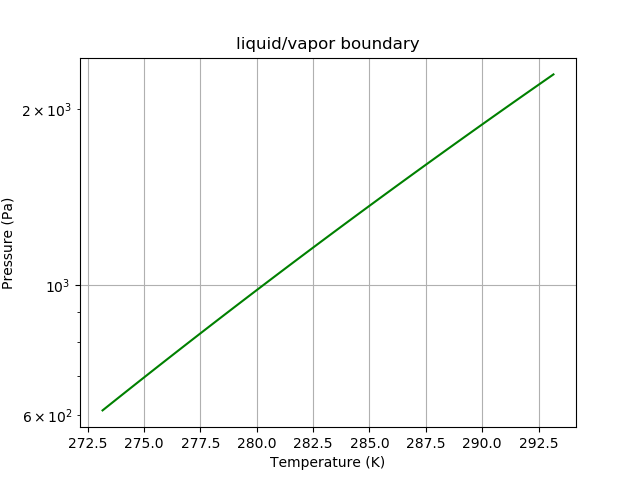

In [5]:
# Define temperature range for this boundary
Tvap = linspace(T3, T3+20)

# Use the Clausius-Clapeyron Equation
Pvap = P3 * exp(-Hvap/R*(1/Tvap-1/T3))

# Graph it
figure()
semilogy(Tvap, Pvap,'g')
xlabel("Temperature (K)")
ylabel("Pressure (Pa)")
title("liquid/vapor boundary")
grid('on')

Plot these together to make sure they overlap OK

<IPython.core.display.Javascript object>


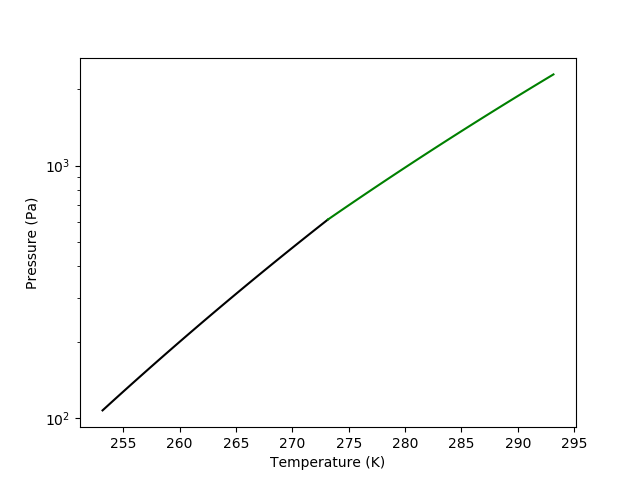

Text(0,0.5,'Pressure (Pa)')

In [6]:
# Plot them together
figure()
semilogy(Tsub, Psub, 'k')
semilogy(Tvap, Pvap, 'g')
xlabel("Temperature (K)")
ylabel("Pressure (Pa)")

Now we need to tackle the Raoult correction.

In [11]:
# Calculate the mole fraction of sea water
n_H2O = 55.5
n_NaCl = 35.0/58.44
x_H2O = n_H2O/(n_H2O+n_NaCl*2)

print (x_H2O)

0.9788737920336087


In [12]:
# Get new vapor pressure using Raoult - extending the graph to a lower temperature
Tvap_sea = linspace(T3-5, 304)
Pvap_sea = (P3 * exp((-Hvap/R)*((1/Tvap_sea)-(1/T3))))*x_H2O


<IPython.core.display.Javascript object>


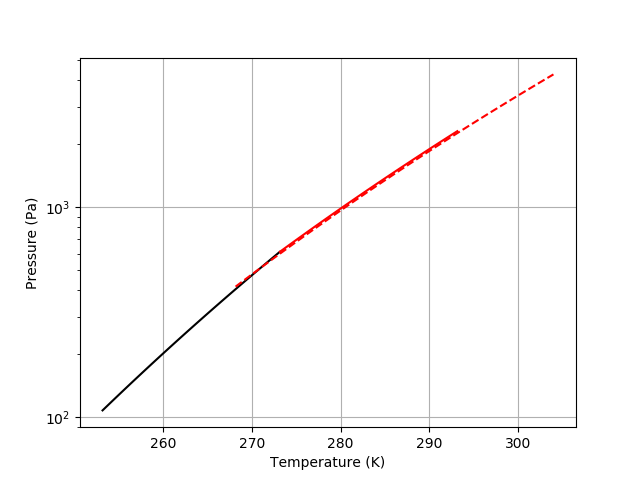

In [13]:
#plot the equations on the same graph
figure()
semilogy(Tsub, Psub, 'k')
semilogy(Tvap, Pvap, 'r')
semilogy(Tvap_sea, Pvap_sea, 'r--')
xlabel("Temperature (K)")
ylabel("Pressure (Pa)")
grid('on')

### Pause for analysis

1. In the graph you just made, there's a new point of intersection between the Raoult-corrected liquid curve, $P_{liq/vap}$, and the ice curve, $P_{ice/vap}^*$. Do some zooming to identify the temperature at which that intersection occurs. This is the freezing temperature of Arctic sea ice! 
2. Compare your result to the observed freezing temperature depression given by the National Snow and Ice Data Center value, https://nsidc.org/cryosphere/seaice/characteristics/brine_salinity.html. You'll have to convert your new freezing temperature to Celsius to make this comparison.   

### Part II. Using Kirchoff's equation to correct the enthalpy of fusion for sea ice 

In [14]:
# Specify the enthalpy of fusion at the reference temperature, T_3
Hfus = 6000 # We'll assume this is the correct value at the triple point temperature

# Specify the temperature depression obtained from the foregoing analysis
Delta_T = 2.0

# Get the difference in heat capacity
Cp_ice = 37.8 # J/mol-K, see https://en.wikipedia.org/wiki/Water_(data_page)
Cp_liquid = 76.0 # J/mol-K
Delta_Cp = Cp_liquid-Cp_ice

# Use Kirchoff's equation to get the new enthalpy of fusion
Hfus_seawater = Hfus - Delta_Cp*Delta_T

# Report the change as a percentage
print ('Hfus for ice in equilibrium with sea water, J/mol = ', Hfus_seawater)
print ('% change = ', (Hfus_seawater-Hfus)/Hfus*100)

Hfus for ice in equilibrium with sea water, J/mol =  5923.6
% change =  -1.2733333333333272


### Pause for analysis

1. Does your analysis suggest that it's easier, or harder, to melt ice when it's in equilibrium with sea water? 
2. Most climate scientists would consider the effect of freezing point depression to be too small, compared to other uncertainties in the climate system, to merit inclusion in climate models. Why do you suppose it is valuable to do the calculation you did anyway?
3. What might those other uncertainties be?

### Post-activity reflection

1. Record your Pause for Analysis reflections in your notebook, with appropriate graphs and equations.
2. Define the terms _Kirchoff's Equation_ and _Raoult's Law_.
